
MKTG5883.N21.CTTT Data mining

Student: Trần Quang Minh, ID: 19521856

Github: https://github.com/MinhGH49/Datamining

Table of contents: 


>>>>[Import the data and get a high-level picture](#scrollTo=hiKDCIvD4LMq)

>>>>[Question: Fix column datatypes](#scrollTo=KLox1Gny4LMu)

>>>>>[Answer: 1. Fix ordered_at to datetime](#scrollTo=D7JzdVPZYRBX)

>>>>>[Answer: 2. Fix price and line_total to float](#scrollTo=9NGjoDWDYdLd)

>>>>[Question: drop if duplicated or null](#scrollTo=quS28WMK4LMv)

>>>>>[Answer: 1. drop duplicates](#scrollTo=ZXu37rPOY5Lg)

>>>>>[Anwser: 2. drop nulls](#scrollTo=bskVCz8EZEXz)

>>>>[Sanity check for value ranges and to check assumptions](#scrollTo=fhYggzu64LMy)

>>>>[Question: Set line_total = price * quantity if different, Remove if line total < 0](#scrollTo=lA92FUUj4LMz)

>>>>>[Answer: set line_total = price * quantity](#scrollTo=fAXOS0sLZg16)

>>>>>[Anser: remove negative line total](#scrollTo=JEdcig4NZstk)

>>>>[Question: Get value between "" in name and put it in category column](#scrollTo=_-MhdQlI4LMz)

>>>>>[Answer: Create new column "category" from "name"](#scrollTo=iGAoPbFdZ2SL)

>>>>[Analysis, finally!](#scrollTo=xETahqiX4LM0)



In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import re
import numpy as np

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Import the data and get a high-level picture

In [66]:
df = pd.read_csv('/content/drive/MyDrive/lab2-datamining/sales.csv')
df.head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,3,$10.50
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,1,$3.50
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,$2.50,2,$5.00
3,10001,NaN,2018-01-01 12:14:54,$1.50,1,$1.50
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,$3.50,1,$3.50


In [67]:
df.shape

(29922, 6)

In [68]:
df.dtypes

order_id       int64
name          object
ordered_at    object
price         object
quantity       int64
line_total    object
dtype: object

#### Question: Fix column datatypes

Change ordered_at to datetime

Change price and line_total to float

##### Answer: 1. Fix ordered_at to datetime


In [69]:
df['ordered_at'] = pd.to_datetime(df['ordered_at'])
df.dtypes


order_id               int64
name                  object
ordered_at    datetime64[ns]
price                 object
quantity               int64
line_total            object
dtype: object

##### Answer: 2. Fix price and line_total to float

In [70]:
df['price'] = df['price'].map(lambda field: field.replace('$', ''))
df['price'] = pd.to_numeric(df['price'])

df['line_total'] = df['line_total'].map(lambda field: field.replace('$', ''))
df['line_total'] = pd.to_numeric(df['line_total'])

df.dtypes

order_id               int64
name                  object
ordered_at    datetime64[ns]
price                float64
quantity               int64
line_total           float64
dtype: object

#### Question: drop if duplicated or null

In [71]:
df[df.duplicated()].shape[0]

538

##### Answer: 1. drop duplicates

In [72]:
df = df.drop_duplicates()
df[df.duplicated()].shape[0]

0

In [73]:
df.isnull().sum()

order_id         0
name          1481
ordered_at       0
price            0
quantity         0
line_total       0
dtype: int64

##### Anwser: 2. drop nulls

In [74]:
df = df.dropna()
df.isnull().sum()

order_id      0
name          0
ordered_at    0
price         0
quantity      0
line_total    0
dtype: int64

In [75]:
df[df['name'].isnull()].head()

,order_id,name,ordered_at,price,quantity,line_total


#### Sanity check for value ranges and to check assumptions

In [76]:
df[(df['price'] * df['quantity']) != df['line_total']].shape[0]

28

In [83]:
df[df['line_total'] < 0].shape[0]

279

In [78]:
df[df['line_total'] < 0]

,order_id,name,ordered_at,price,quantity,line_total
28,10007,"""ICE CREAM"" Matcha",2018-01-01 15:03:17,-1.5,2,-3.0
51,10016,"""SORBET"" Raspberry",2018-01-01 20:53:59,-2.5,1,-2.5
188,10066,"""ICE CREAM"" Vanilla Bean",2018-01-02 22:46:28,-1.5,3,-4.5
267,10090,"""SORBET"" Blood Orange",2018-01-03 09:05:40,-2.5,2,-5.0
524,10174,"""ICE CREAM"" Earl Gray",2018-01-04 21:10:43,-0.5,2,-1.0
...,...,...,...,...,...,...
29223,19786,"""SORBET"" Raspberry",2018-07-24 10:40:16,-2.5,3,-7.5
29434,19859,"""SORBET"" Watermelon",2018-07-26 00:22:52,-2.5,2,-5.0
29466,19871,"""MISC"" Ice Cream Cake",2018-07-26 06:27:30,-2.0,1,-2.0
29514,19886,"""ICE CREAM"" Candied Bacon",2018-07-26 14:53:55,-0.5,3,-1.5


#### Question: Set line_total = price * quantity if different, Remove if line total < 0

##### Answer: set line_total = price * quantity

In [81]:
def removeIncorrectRows(row: pd.Series):
  correctTotal = row['price'] * row['quantity']
  row['line_total'] = correctTotal
  return row

In [82]:
df = df.apply(func=removeIncorrectRows, axis = 1)
df[(df['price'] * df['quantity']) != df['line_total']]


,order_id,name,ordered_at,price,quantity,line_total


##### Anser: remove negative line total

In [85]:
df = df[df.apply(lambda row: False if row['line_total'] < 0 else True, axis=1)]
df[df['line_total'] < 0].shape[0]

0

In [86]:
df.dtypes

order_id               int64
name                  object
ordered_at    datetime64[ns]
price                float64
quantity               int64
line_total           float64
dtype: object

In [88]:
df.describe()

,order_id,price,quantity,line_total
count,27624.000000,27624.000000,27624.000000,27624.000000
mean,14993.783051,2.511711,2.000724,5.028743
std,2888.516649,1.059244,0.819432,3.085410
min,10000.000000,0.500000,1.000000,0.500000
25%,12501.750000,1.500000,1.000000,2.500000
50%,14973.000000,2.500000,2.000000,4.500000
75%,17507.000000,3.500000,3.000000,7.500000
max,19999.000000,4.000000,3.000000,12.000000


#### Question: Get value between "" in name and put it in category column

##### Answer: Create new column "category" from "name" 

In [93]:

def generateCategory(row: pd.Series):
  row['category'] = re.split("\"", row['name'])[1]
  return row
df = df.apply(generateCategory, axis = 1)
df.head(10)

,order_id,name,ordered_at,price,quantity,line_total,category
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5,ICE CREAM
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5,ICE CREAM
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2,5.0,SORBET
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,3.5,1,3.5,CONE
5,10002,"""SORBET"" Lychee",2018-01-01 12:23:09,3.0,1,3.0,SORBET
7,10002,"""ICE CREAM"" Earl Gray",2018-01-01 12:23:09,0.5,3,1.5,ICE CREAM
8,10003,"""ICE CREAM"" Matcha",2018-01-01 12:49:35,1.5,3,4.5,ICE CREAM
9,10004,"""BEVERAGE"" Iced Coffee",2018-01-01 13:22:59,2.5,2,5.0,BEVERAGE
10,10004,"""BEVERAGE"" Espresso",2018-01-01 13:22:59,2.5,1,2.5,BEVERAGE
11,10004,"""ICE CREAM"" Mint Chip",2018-01-01 13:22:59,1.5,2,3.0,ICE CREAM


In [94]:
def dropCategoryInName(row: pd.Series):
  row['name'] = re.split("\"", row['name'])[2]
  return row 
df = df.apply(dropCategoryInName, axis = 1)
df.head(10)

,order_id,name,ordered_at,price,quantity,line_total,category
0,10000,Peanut Fudge,2018-01-01 11:30:00,3.5,3,10.5,ICE CREAM
1,10000,Peanut Fudge,2018-01-01 11:30:00,3.5,1,3.5,ICE CREAM
2,10001,Raspberry,2018-01-01 12:14:54,2.5,2,5.0,SORBET
4,10001,Dipped Waffle Cone,2018-01-01 12:14:54,3.5,1,3.5,CONE
5,10002,Lychee,2018-01-01 12:23:09,3.0,1,3.0,SORBET
7,10002,Earl Gray,2018-01-01 12:23:09,0.5,3,1.5,ICE CREAM
8,10003,Matcha,2018-01-01 12:49:35,1.5,3,4.5,ICE CREAM
9,10004,Iced Coffee,2018-01-01 13:22:59,2.5,2,5.0,BEVERAGE
10,10004,Espresso,2018-01-01 13:22:59,2.5,1,2.5,BEVERAGE
11,10004,Mint Chip,2018-01-01 13:22:59,1.5,2,3.0,ICE CREAM


In [ ]:
df.head()

,order_id,name,ordered_at,price,quantity,line_total,category
0,10000,Peanut Fudge,2018-01-01 11:30:00,3.5,3,10.5,ICE CREAM
1,10000,Peanut Fudge,2018-01-01 11:30:00,3.5,1,3.5,ICE CREAM
2,10001,Raspberry,2018-01-01 12:14:54,2.5,2,5.0,SORBET
4,10001,Dipped Waffle Cone,2018-01-01 12:14:54,3.5,1,3.5,CONE
5,10002,Lychee,2018-01-01 12:23:09,3.0,1,3.0,SORBET


In [96]:
df.dtypes

order_id               int64
name                  object
ordered_at    datetime64[ns]
price                float64
quantity               int64
line_total           float64
category              object
dtype: object

#### Analysis, finally!

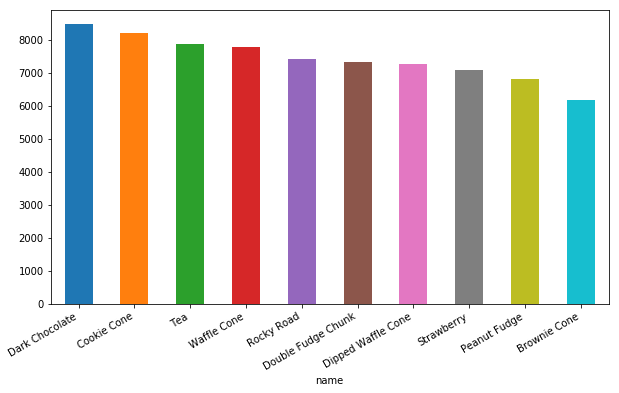

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
df.groupby('name')['line_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
f.autofmt_xdate()
plt.show()

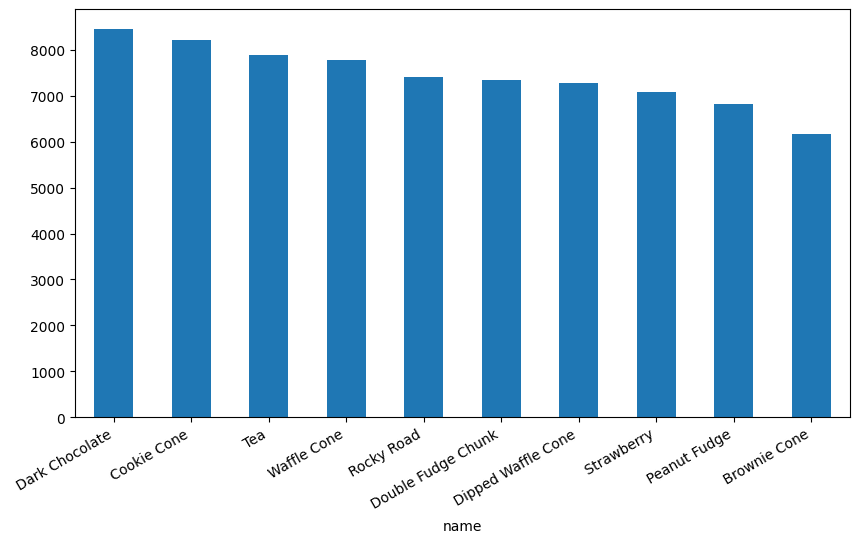

In [95]:
f, ax = plt.subplots(figsize=(10, 6))
df.groupby('name')['line_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
f.autofmt_xdate()
plt.show()